In [2]:
import pandas as pd 
import os 

In [9]:
files = [file for file in os.listdir('../1_mockData')]

all_months_data = pd.DataFrame()

for file in files:
    if(".csv" in file):
        print(file)
        df = pd.read_csv("../1_mockData/"+file)
        all_months_data = pd.concat([all_months_data,df])
        
all_months_data.to_csv("all_data_sales.csv",index=False)

1_orderwise_sales_December.csv
1_orderwise_sales_October.csv
1_orderwise_sales_July.csv
1_orderwise_sales_September.csv
1_orderwise_sales_June.csv
1_orderwise_sales_May.csv
1_orderwise_sales_January.csv
1_orderwise_sales_March.csv
1_orderwise_sales_February.csv
1_orderwise_sales_November.csv
1_orderwise_sales_April.csv
1_orderwise_sales_August.csv


In [7]:
df = pd.read_csv("all_data_sales.csv")
df.sample(5)

,Unnamed: 0,OrderID,Product,QtyOrdered,UnitPrice,OrderDate,OrderLocation,Month,ClientName
14868,2124,10289,prod15,1,1000,07/16/19 18:44,"124 South St, New York City ,NY",July,Client2
9560,2468,14477,prod13,6,200,10/21/19 14:11,"650 Sunset St, Atlanta ,GA",October,Client5
51089,460,6030,prod1,4,700,04/22/19 12:14,"189 Washington St, San Francisco ,CA",April,Client0
56936,2389,11877,prod12,5,400,08/26/19 15:31,"243 River St, New York City ,NY",August,Client2
35697,1308,4884,prod5,1,900,03/02/19 16:33,"8 Lake St, Dallas ,TX",March,Client4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59094 entries, 0 to 59093
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     59094 non-null  int64 
 1   OrderID        59094 non-null  int64 
 2   Product        59094 non-null  object
 3   QtyOrdered     59094 non-null  int64 
 4   UnitPrice      59094 non-null  int64 
 5   OrderDate      59094 non-null  object
 6   OrderLocation  59094 non-null  object
 7   Month          59094 non-null  object
 8   ClientName     59094 non-null  object
dtypes: int64(4), object(5)
memory usage: 4.1+ MB


In [5]:
df.describe()

,Unnamed: 0,OrderID,QtyOrdered,UnitPrice
count,59094.000000,59094.000000,59094.000000,59094.000000
mean,2574.685704,10307.503486,4.428588,559.801333
std,1609.386840,5384.004816,3.497477,302.814769
min,0.000000,1001.000000,1.000000,100.000000
25%,1231.000000,5642.000000,1.000000,300.000000
50%,2462.000000,10313.000000,3.000000,500.000000
75%,3745.000000,14978.000000,8.000000,800.000000
max,7091.000000,19622.000000,11.000000,1000.000000


# Desired datasets : 
## Orderwise prediction of sales 
OrderID | ProdName | Prod Qty | Unit Price | Month | Order Location | Client Sentiment (before order) | Salesperson Sentiment (before order) | Total sales

## Productwise prediction of sales 
ProdName | Month | Order Value | Order Qty | # sold

## Clientwise prediction of sales 
CustID | CustName | Month | Location | Client Sentiments | Salesperson Sentiments | Total Sales  

In [8]:
# Build from df + df_senti + clientwise
#orderwise : orderid | prodarr              |totQty | month | location| ClientName |totPrice| cli avg sentiScore| sp avg sentiScore            
#           ord_id_1 | [prod1,prod2,prod3,..]| 4    |January| addr    |   client1  |  4555  |     60            |         30
# predict totPrice(reg)

#prodwise : prodName | month | orderQty | orderTotal |clientName| prodPrice(unit*qty)
#             prod1  |January|  5       |    4555    |client1   |     2555
# predict prodPrice(reg) , prodName(classif), clientName(classif)

#clientwise: clientName | month | orderQty | prodarr        | orderTotal  | cli_avg_senti | sp_avg_senti
#             client1   |January|   40      |[p1,p2,p3,p4]  |    30000    |      60       |       50 
# predict orderTotal(reg) 

#df_senti 
#for orderwise order_id  | cli_chats(bef that order) | sp_chats(bef that order) | cli_avg_senti | sp_avg_senti

#Build from df_senti

#for clientwise   clientName | month | cli_chats(that month) | sp_chats(that month) | cli_avg_senti | sp_avg_senti

In [ ]:
df = df.reset_index()


In [ ]:
columns_orderwise = ['OrderId','Prodarr','TotQty','Month','Location','ClientName','CliAvgSentiScore','SPAvgSentScore','TotPrice']
df_orderwise = pd.DataFrame(columns=columns_orderwise)
i = 0
for index, row in df.iterrows():
#     print(row['OrderID'])
    df_orderwise.loc[i] = [row['OrderID'],"NA","NA","NA","NA","NA","NA","NA","NA"]
    i=i+1

In [ ]:
df_orderwise.head()

In [27]:
def create_orderwise_1(x):
    return x
def create_orderwise_2(x):
    

In [28]:
result1 = [create_orderwise_1(x) for x in df['OrderID']]
df_orderwise_1 = pd.DataFrame(result1)
df_orderwise_1.head()

,0
0,17393
1,17393
2,17393
3,17393
4,17394


In [ ]:
result2 = []
# Iterating over one column - `f` is some function that processes your data
result = [f(x) for x in df['col']]
# Iterating over two columns, use `zip`
result = [f(x, y) for x, y in zip(df['col1'], df['col2'])]
# Iterating over multiple columns - same data type
result = [f(row[0], ..., row[n]) for row in df[['col1', ...,'coln']].to_numpy()]
# Iterating over multiple columns - differing data type
result = [f(row[0], ..., row[n]) for row in zip(df['col1'], ..., df['coln'])]


# Final data generation 

In [4]:
import pandas as pd
df_raw = pd.read_csv("all_data_sales.csv")
df_raw.sample(2)

,Unnamed: 0,OrderID,Product,QtyOrdered,UnitPrice,OrderDate,OrderLocation,Month,ClientName
5000,5000,18965,prod14,1,100,12/31/19 20:09,"248 West St, Los Angeles ,CA",December,Client8
49507,4967,17042,prod4,4,800,11/14/19 21:39,"335 Spruce St, New York City ,NY",November,Client2


In [5]:
df_raw.sample(2)

,Unnamed: 0,OrderID,Product,QtyOrdered,UnitPrice,OrderDate,OrderLocation,Month,ClientName
12815,71,9635,prod10,1,1000,07/19/19 09:29,"406 1st St, Dallas ,TX",July,Client4
45786,1246,15869,prod7,1,400,11/09/19 11:52,"694 Johnson St, Dallas ,TX",November,Client4


In [6]:
nan_df = df_raw[df_raw.isna().any(axis=1)]
nan_df
df_raw = df_raw.dropna(how='all')
df_raw.sample(2)

,Unnamed: 0,OrderID,Product,QtyOrdered,UnitPrice,OrderDate,OrderLocation,Month,ClientName
13718,974,9922,prod13,10,200,07/19/19 13:26,"913 5th St, New York City ,NY",July,Client2
25156,782,7366,prod3,7,300,05/17/19 00:04,"121 West St, New York City ,NY",May,Client2


In [7]:
df_raw['MonthNum'] = df_raw['OrderDate'].str[0:2]
df_raw['MonthNum'] = df_raw['MonthNum'].astype('int32')
df_raw.sample(2)

,Unnamed: 0,OrderID,Product,QtyOrdered,UnitPrice,OrderDate,OrderLocation,Month,ClientName,MonthNum
19175,1665,13088,prod13,4,200,09/03/19 08:22,"558 Hill St, Los Angeles ,CA",September,Client8,9
46545,2005,16107,prod12,10,400,11/05/19 07:24,"59 Pine St, Atlanta ,GA",November,Client5,11


In [8]:
# sales column
df_raw['Sales']= df_raw['QtyOrdered']*df_raw['UnitPrice']
df_raw.sample(2)

,Unnamed: 0,OrderID,Product,QtyOrdered,UnitPrice,OrderDate,OrderLocation,Month,ClientName,MonthNum,Sales
38349,3960,5723,prod15,4,1000,03/14/19 11:33,"767 Sunset St, San Francisco ,CA",March,Client0,3,4000
19559,2049,13205,prod12,8,400,09/19/19 08:41,"162 Spruce St, Los Angeles ,CA",September,Client8,9,3200


In [9]:
# city column
def get_city(loc):
    return loc.split(',')[1]
def get_state(loc):
    return loc.split(',')[2].split(' ')[0]
df_raw['City'] = df_raw['OrderLocation'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
df_raw.sample(2)

,Unnamed: 0,OrderID,Product,QtyOrdered,UnitPrice,OrderDate,OrderLocation,Month,ClientName,MonthNum,Sales,City
42322,3453,3770,prod5,11,900,02/04/19 20:09,"585 Sunset St, New York City ,NY",February,Client2,2,9900,New York City (NY)
44076,5207,4322,prod5,3,900,02/20/19 22:32,"492 Church St, New York City ,NY",February,Client2,2,2700,New York City (NY)


In [10]:
df_raw_monthwise = df_raw.groupby('MonthNum').sum()
df_raw_monthwise

,Unnamed: 0,OrderID,QtyOrdered,UnitPrice,Sales
MonthNum,,,,,
1,14555423,10041514,23940,2999500,13135600
2,16093534,20280767,25195,3187800,14221500
3,10018049,23145996,19745,2510400,11075000
4,7681719,25477633,17361,2206500,9638200
5,10611507,36159002,20351,2609600,11612600
6,5385083,29739129,14270,1839900,8086500
7,11357022,49474788,20960,2669200,11861900
8,10330201,53832273,20021,2546400,11218500
9,6484020,47294652,15973,1994300,8891000


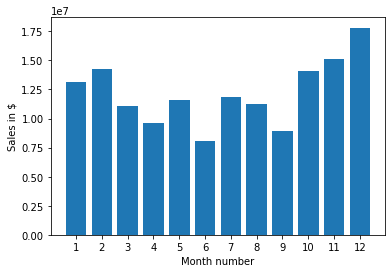

In [11]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months,df_raw_monthwise['Sales'])
plt.xticks(months)
plt.ylabel('Sales in $')
plt.xlabel('Month number')
plt.show()

In [12]:
df_raw_city = df_raw.groupby('City').sum()
df_raw_city

,Unnamed: 0,OrderID,QtyOrdered,UnitPrice,MonthNum,Sales
City,,,,,,
Atlanta (GA),12101585,47456426,20761,2599300,31072,11710500
Austin (TX),8201049,31854086,14235,1783200,20814,8096400
Boston (MA),15760321,64116379,27593,3481300,42095,15492800
Dallas (TX),12936521,51428881,21968,2764200,33625,12248700
Los Angeles (CA),24441069,96823859,41813,5207600,63410,23369100
New York City (NY),19878696,80026683,34604,4415400,52475,19398100
Portland (ME),1920025,8337720,3491,441400,5489,1938700
Portland (OR),8545140,32739823,14461,1829600,21386,8211600
San Francisco (CA),36510375,148478006,62642,7992500,97482,35049400


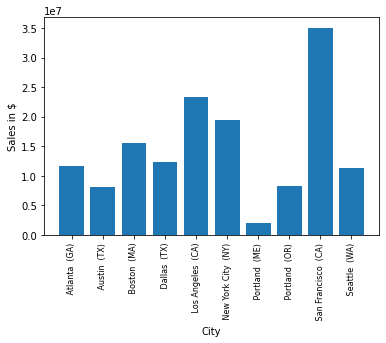

In [13]:
cities = [city for city, df in df_raw.groupby('City') ]
plt.bar(cities,df_raw_city['Sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.ylabel('Sales in $')
plt.xlabel('City')
plt.show()

In [14]:
df_raw_client = df_raw.groupby('ClientName').sum()
df_raw_client

,Unnamed: 0,OrderID,QtyOrdered,UnitPrice,MonthNum,Sales
ClientName,,,,,,
Client0,36510375,148478006,62642,7992500,97482,35049400
Client1,15760321,64116379,27593,3481300,42095,15492800
Client2,19878696,80026683,34604,4415400,52475,19398100
Client3,8201049,31854086,14235,1783200,20814,8096400
Client4,12936521,51428881,21968,2764200,33625,12248700
Client5,12101585,47456426,20761,2599300,31072,11710500
Client6,8545140,32739823,14461,1829600,21386,8211600
Client7,1920025,8337720,3491,441400,5489,1938700
Client8,24441069,96823859,41813,5207600,63410,23369100


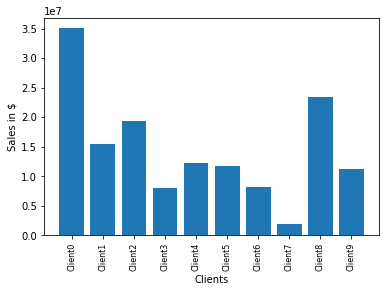

In [15]:
clients = [city for city, df in df_raw.groupby('ClientName') ]
plt.bar(clients,df_raw_client['Sales'])
plt.xticks(clients,rotation='vertical',size=8)
plt.ylabel('Sales in $')
plt.xlabel('Clients')
plt.show()

In [16]:
df_raw_product = df_raw.groupby('Product').sum()
df_raw_product

,Unnamed: 0,OrderID,QtyOrdered,UnitPrice,MonthNum,Sales
Product,,,,,,
prod1,18284375,74276693,31768,4976300,48705,22237600
prod10,10961631,43145560,18796,4244000,28253,18796000
prod11,7143654,28619162,12203,1654800,18734,7321800
prod12,16085762,64627219,27580,2504800,42375,11032000
prod13,12492851,49984723,21342,963400,32785,4268400
prod14,11051173,44312906,18609,425700,29063,1860900
prod15,17957642,71554827,30516,6926000,46914,30516000
prod2,14694754,58447707,25602,2857000,38294,12801000
prod3,12542075,50125735,21693,1469400,32855,6507900


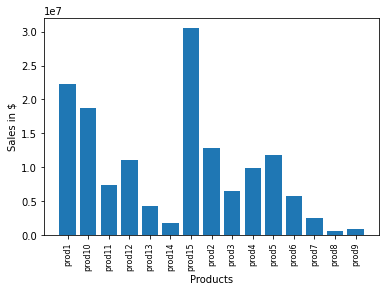

In [17]:
prods = [prod for prod, df in df_raw.groupby('Product') ]
plt.bar(prods,df_raw_product['Sales'])
plt.xticks(prods,rotation='vertical',size=8)
plt.ylabel('Sales in $')
plt.xlabel('Products')
plt.show()

In [66]:
df_raw.head(2)

,Unnamed: 0,OrderID,Product,QtyOrdered,UnitPrice,OrderDate,OrderLocation,Month,ClientName,MonthNum,Sales,City
0,0,17393,prod4,1,800,12/06/19 08:30,"79 Walnut St, New York City ,NY",December,Client2,12,800,New York City (NY)
1,1,17393,prod12,4,400,12/06/19 08:30,"79 Walnut St, New York City ,NY",December,Client2,12,1600,New York City (NY)


In [69]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59094 entries, 0 to 59093
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     59094 non-null  int64 
 1   OrderID        59094 non-null  int64 
 2   Product        59094 non-null  object
 3   QtyOrdered     59094 non-null  int64 
 4   UnitPrice      59094 non-null  int64 
 5   OrderDate      59094 non-null  object
 6   OrderLocation  59094 non-null  object
 7   Month          59094 non-null  object
 8   ClientName     59094 non-null  object
 9   MonthNum       59094 non-null  int32 
 10  Sales          59094 non-null  int64 
 11  City           59094 non-null  object
dtypes: int32(1), int64(5), object(6)
memory usage: 5.2+ MB


In [73]:
df_raw['OrderDate'] = pd.to_datetime(df_raw['OrderDate'])
df_raw['Hour'] = df_raw['OrderDate'].dt.hour
df_raw['Minute'] = df_raw['OrderDate'].dt.minute
df_raw['Day'] = df_raw['OrderDate'].dt.dayofweek

In [75]:
df_raw.head(2)

,Unnamed: 0,OrderID,Product,QtyOrdered,UnitPrice,OrderDate,OrderLocation,Month,ClientName,MonthNum,Sales,City,Hour,Minute,Day
0,0,17393,prod4,1,800,2019-12-06 08:30:00,"79 Walnut St, New York City ,NY",December,Client2,12,800,New York City (NY),8,30,4
1,1,17393,prod12,4,400,2019-12-06 08:30:00,"79 Walnut St, New York City ,NY",December,Client2,12,1600,New York City (NY),8,30,4


In [77]:
df_raw.describe()

,Unnamed: 0,OrderID,QtyOrdered,UnitPrice,MonthNum,Sales,Hour,Minute,Day
count,59094.000000,59094.000000,59094.000000,59094.000000,59094.000000,59094.000000,59094.000000,59094.000000,59094.000000
mean,2574.685704,10307.503486,4.428588,559.801333,6.756625,2483.805462,14.386435,29.535943,2.985278
std,1609.386840,5384.004816,3.497477,302.814769,3.692392,2601.863479,5.454307,17.390200,1.997694
min,0.000000,1001.000000,1.000000,100.000000,1.000000,100.000000,0.000000,0.000000,0.000000
25%,1231.000000,5642.000000,1.000000,300.000000,3.000000,600.000000,11.000000,14.250000,1.000000
50%,2462.000000,10313.000000,3.000000,500.000000,7.000000,1200.000000,15.000000,29.000000,3.000000
75%,3745.000000,14978.000000,8.000000,800.000000,10.000000,3600.000000,19.000000,45.000000,5.000000
max,7091.000000,19622.000000,11.000000,1000.000000,12.000000,11000.000000,23.000000,59.000000,6.000000


In [91]:
hours = [hour for hour, df in df_raw.groupby('Hour')]
print(hours)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [104]:
df_raw.groupby(['Hour']).count()["Sales"]

Hour
0     1338
1      773
2      449
3      280
4      224
5      425
6      754
7     1381
8     1835
9     2763
10    3388
11    4037
12    3853
13    3755
14    3706
15    3243
16    3199
17    3674
18    3938
19    3904
20    4016
21    3458
22    2748
23    1953
Name: Sales, dtype: int64

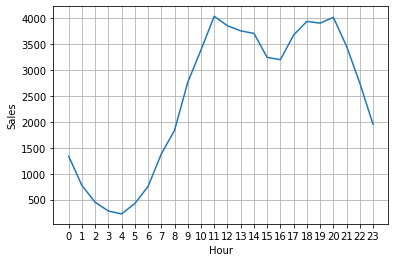

In [107]:
hours = [hour for hour, df in df_raw.groupby('Hour')]
plt.plot(hours,df_raw.groupby(['Hour']).count()["Sales"])
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Sales")
plt.grid()
plt.show()

In [133]:
df_raw.shape

(59094, 15)

In [128]:
df_raw.head(2)

,Unnamed: 0,OrderID,Product,QtyOrdered,UnitPrice,OrderDate,OrderLocation,Month,ClientName,MonthNum,Sales,City,Hour,Minute,Day
0,0,17393,prod4,1,800,2019-12-06 08:30:00,"79 Walnut St, New York City ,NY",December,Client2,12,800,New York City (NY),8,30,4
1,1,17393,prod12,4,400,2019-12-06 08:30:00,"79 Walnut St, New York City ,NY",December,Client2,12,1600,New York City (NY),8,30,4


In [134]:
df_raw_1 = df_raw[df_raw['OrderID'].duplicated(keep=False)]
print(df_raw_1.shape)
df_raw_1.head(3)

(59094, 15)


,Unnamed: 0,OrderID,Product,QtyOrdered,UnitPrice,OrderDate,OrderLocation,Month,ClientName,MonthNum,Sales,City,Hour,Minute,Day
0,0,17393,prod4,1,800,2019-12-06 08:30:00,"79 Walnut St, New York City ,NY",December,Client2,12,800,New York City (NY),8,30,4
1,1,17393,prod12,4,400,2019-12-06 08:30:00,"79 Walnut St, New York City ,NY",December,Client2,12,1600,New York City (NY),8,30,4
2,2,17393,prod2,7,500,2019-12-06 08:30:00,"79 Walnut St, New York City ,NY",December,Client2,12,3500,New York City (NY),8,30,4


In [136]:
df_raw_1['Prods'] = df_raw_1.groupby("OrderID")['Product'].transform(lambda x: ','.join(x))

In [137]:
df_raw_1.head(2)

,Unnamed: 0,OrderID,Product,QtyOrdered,UnitPrice,OrderDate,OrderLocation,Month,ClientName,MonthNum,Sales,City,Hour,Minute,Day,Prods
0,0,17393,prod4,1,800,2019-12-06 08:30:00,"79 Walnut St, New York City ,NY",December,Client2,12,800,New York City (NY),8,30,4,"prod4,prod12,prod2,prod5"
1,1,17393,prod12,4,400,2019-12-06 08:30:00,"79 Walnut St, New York City ,NY",December,Client2,12,1600,New York City (NY),8,30,4,"prod4,prod12,prod2,prod5"


In [139]:
df_raw = df_raw_1.copy()
df_raw.head(2)

,Unnamed: 0,OrderID,Product,QtyOrdered,UnitPrice,OrderDate,OrderLocation,Month,ClientName,MonthNum,Sales,City,Hour,Minute,Day,Prods
0,0,17393,prod4,1,800,2019-12-06 08:30:00,"79 Walnut St, New York City ,NY",December,Client2,12,800,New York City (NY),8,30,4,"prod4,prod12,prod2,prod5"
1,1,17393,prod12,4,400,2019-12-06 08:30:00,"79 Walnut St, New York City ,NY",December,Client2,12,1600,New York City (NY),8,30,4,"prod4,prod12,prod2,prod5"


## Orderwise try1

In [140]:
columns_orderwise_try1 = ['OrderId','Prods','TotQty','Month','Location','ClientName','CliAvgSenti','SpAvgSenti','TotPrice']
df_orderwise_try1 = pd.DataFrame(columns=columns_orderwise_try1)
print("Predict: TotPrice")
df_orderwise_try1.head()
#if not using query : build the entire dataframe during data gen


Predict: TotPrice


,OrderId,Prods,TotQty,Month,Location,ClientName,CliAvgSenti,SpAvgSenti,TotPrice


## Productwise try1

In [141]:
columns_productwise_try1 = ['ProdName','Month','OrderQty','OrderTotal','ClientName','ProdPrice']
df_productwise_try1 = pd.DataFrame(columns=columns_productwise_try1)
print('Predict: ProdPrice,ProdName,ClientName')
df_productwise_try1['ProdName'] = df_raw['Product'].copy()
df_productwise_try1['Month'] = df_raw['Month'].copy()
#OrderQty calculate later ; if not by query -- do during data gen
#OrderTotal calculate later : if not by query -- do during data gen
df_productwise_try1['ClientName'] = df_raw['ClientName'].copy()
df_productwise_try1['ProdPrice'] = df_raw['UnitPrice']*df_raw['QtyOrdered']
df_productwise_try1.head()

Predict: ProdPrice,ProdName,ClientName


,ProdName,Month,OrderQty,OrderTotal,ClientName,ProdPrice
0,prod4,December,NaN,NaN,Client2,800
1,prod12,December,NaN,NaN,Client2,1600
2,prod2,December,NaN,NaN,Client2,3500
3,prod5,December,NaN,NaN,Client2,9000
4,prod14,December,NaN,NaN,Client4,100


## Clientwise try1

In [142]:
columns_clientwise_try1 = ['ClientName','Month','OrderQty','Prods','CliAvgSenti','SpAvgSenti','OrderTotal']
df_clientwise_try1 = pd.DataFrame(columns=columns_clientwise_try1)
print('Predict: OrderTotal')
df_clientwise_try1.head()
# do using query or drop this dataframe altogether

Predict: OrderTotal


,ClientName,Month,OrderQty,Prods,CliAvgSenti,SpAvgSenti,OrderTotal


## Senti_orderwise try1

In [165]:
def encodeSentiment(x):
    if(x == "positive"):
        return 1
    elif (x == "negative"):
        return 0

df_movie_reviews = pd.read_csv("./data/IMDBDataset.csv")

df_movie_reviews['sentiment'] = df_movie_reviews['sentiment'].apply(encodeSentiment)


df_movie_reviews.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [166]:
df_movie_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [192]:
import random
a = random.randint(0,49999)
a

6789

In [180]:
columns_senti_orderwise_try1 = ['OrderId','CliChats','SpChats','CliAvgSenti','Sp_avg_senti'] 
df_senti_orderwise_try1 = pd.DataFrame(columns=columns_senti_orderwise_try1)
df_senti_orderwise_try1['OrderId'] = df_raw['OrderID']

for i in range(0,df_senti_orderwise_try1.shape[0]):
    cliChats = ""
    spChats = ""
    cliAvgSenti = 0 
    spAvgSenti = 0 
    
    for(j=0;j<5;j++):
        a = random.randint(0,49999)
        cliChats.append(df_movie_reviews.loc[a])

print(df_senti_orderwise_try1.shape)
df_senti_orderwise_try1.head()

SyntaxError: invalid syntax (947676196.py, line 5)

## Senti_clientwise try1

In [144]:
columns_senti_clientwise_try1 = ['ClientName','Month','CliChats','SpChats','CliAvgSenti','SpAvgSenti']
df_senti_clientwise_try1 = pd.DataFrame(columns=columns_senti_clientwise_try1)
df_senti_clientwise_try1.head()

,ClientName,Month,CliChats,SpChats,CliAvgSenti,SpAvgSenti


## Orderwise try2

In [145]:
print(df_raw.shape)
df_raw.sample(2)

(59094, 16)


,Unnamed: 0,OrderID,Product,QtyOrdered,UnitPrice,OrderDate,OrderLocation,Month,ClientName,MonthNum,Sales,City,Hour,Minute,Day,Prods
19017,1507,13038,prod2,1,500,2019-09-29 01:25:00,"298 Johnson St, San Francisco ,CA",September,Client0,9,500,San Francisco (CA),1,25,6,"prod2,prod3,prod1"
45355,815,15733,prod11,3,600,2019-11-17 12:55:00,"622 Main St, Boston ,MA",November,Client1,11,1800,Boston (MA),12,55,6,"prod3,prod11,prod2"


In [146]:
df_orderwise_try2 = df_raw.groupby('OrderID').sum()
print(df_orderwise_try2.shape)
df_orderwise_try2.tail(3)

(18622, 8)


,Unnamed: 0,QtyOrdered,UnitPrice,MonthNum,Sales,Hour,Minute,Day
OrderID,,,,,,,,
19620,21249,10,800,36,2200,45,120,18
19621,28346,19,3300,48,15900,0,16,24
19622,21270,15,1700,36,10400,27,171,6


In [147]:
df_orderwise_try3 = df_raw.groupby(['OrderID','ClientName']).sum()
print(df_orderwise_try3.shape)
df_orderwise_try3.tail(3)

(18622, 8)


,,Unnamed: 0,QtyOrdered,UnitPrice,MonthNum,Sales,Hour,Minute,Day
OrderID,ClientName,,,,,,,,
19620,Client2,21249,10,800,36,2200,45,120,18
19621,Client9,28346,19,3300,48,15900,0,16,24
19622,Client4,21270,15,1700,36,10400,27,171,6


In [152]:
df_orderwise_try4 = df_raw.groupby(['OrderID','ClientName','MonthNum','Hour','Minute','Day','Prods'],as_index=False).sum()
print(df_orderwise_try4.shape)
df_orderwise_try4.drop(['Unnamed: 0','UnitPrice'], axis=1, inplace=True)
df_orderwise_try4.head(3)

(18622, 11)


,OrderID,ClientName,MonthNum,Hour,Minute,Day,Prods,QtyOrdered,Sales
0,1001,Client1,1,20,51,4,"prod14,prod6,prod2",5,2400
1,1002,Client8,1,21,3,0,"prod2,prod15,prod15",10,9500
2,1003,Client0,1,18,22,4,"prod2,prod9,prod1",10,3200


In [153]:
df_orderwise_try4.columns

Index(['OrderID', 'ClientName', 'MonthNum', 'Hour', 'Minute', 'Day', 'Prods',
       'QtyOrdered', 'Sales'],
      dtype='object')

In [154]:
df_orderwise_try4.head(2)

,OrderID,ClientName,MonthNum,Hour,Minute,Day,Prods,QtyOrdered,Sales
0,1001,Client1,1,20,51,4,"prod14,prod6,prod2",5,2400
1,1002,Client8,1,21,3,0,"prod2,prod15,prod15",10,9500


## productwise try2

In [155]:
print(df_raw.shape)
df_raw.head(2)

(59094, 16)


,Unnamed: 0,OrderID,Product,QtyOrdered,UnitPrice,OrderDate,OrderLocation,Month,ClientName,MonthNum,Sales,City,Hour,Minute,Day,Prods
0,0,17393,prod4,1,800,2019-12-06 08:30:00,"79 Walnut St, New York City ,NY",December,Client2,12,800,New York City (NY),8,30,4,"prod4,prod12,prod2,prod5"
1,1,17393,prod12,4,400,2019-12-06 08:30:00,"79 Walnut St, New York City ,NY",December,Client2,12,1600,New York City (NY),8,30,4,"prod4,prod12,prod2,prod5"


In [156]:
columns_productwise_try2 = ['ProdName','MonthNum','OrderID','OrderQty','OrderTotal','ClientName','ProdPrice']
df_productwise_try2 = pd.DataFrame(columns=columns_productwise_try2)
print('Predict: ProdPrice,ProdName,ClientName')
df_productwise_try2['ProdName'] = df_raw['Product'].copy()
df_productwise_try2['MonthNum'] = df_raw['MonthNum'].copy()
df_productwise_try2['OrderID'] = df_raw['OrderID'].copy()
df_productwise_try2['ClientName'] = df_raw['ClientName'].copy()
df_productwise_try2['ProdPrice'] = df_raw['UnitPrice']*df_raw['QtyOrdered']
df_productwise_try2['Hour']=df_raw['Hour']
df_productwise_try2['Minute']=df_raw['Minute']
df_productwise_try2['Day']=df_raw['Day']

df_productwise_try2.head()

Predict: ProdPrice,ProdName,ClientName


,ProdName,MonthNum,OrderID,OrderQty,OrderTotal,ClientName,ProdPrice,Hour,Minute,Day
0,prod4,12,17393,NaN,NaN,Client2,800,8,30,4
1,prod12,12,17393,NaN,NaN,Client2,1600,8,30,4
2,prod2,12,17393,NaN,NaN,Client2,3500,8,30,4
3,prod5,12,17393,NaN,NaN,Client2,9000,8,30,4
4,prod14,12,17394,NaN,NaN,Client4,100,17,28,3


In [157]:
def findOrderQty(ordid):
#     return df_orderwise_try4.loc[df_orderwise_try4['OrderID'] == ordid]['QtyOrdered']
#     return ordid+1
#     return df_orderwise_try4.loc[]
    df_row_filtered = df_orderwise_try4.loc[df_orderwise_try4['OrderID'] == ordid]
#     print(df_row_filtered["QtyOrdered"].values[0])
    return df_row_filtered["QtyOrdered"].values[0]
df_productwise_try2['OrderQty']=df_productwise_try2['OrderID'].apply(findOrderQty)

In [158]:
def findOrderTotal(ordid):
    df_row_filtered = df_orderwise_try4.loc[df_orderwise_try4['OrderID'] == ordid]
    return df_row_filtered["Sales"].values[0]
df_productwise_try2['OrderTotal']=df_productwise_try2['OrderID'].apply(findOrderTotal)

In [159]:
print(df_productwise_try2.shape)
df_productwise_try2.head(2)

(59094, 10)


,ProdName,MonthNum,OrderID,OrderQty,OrderTotal,ClientName,ProdPrice,Hour,Minute,Day
0,prod4,12,17393,22,14900,Client2,800,8,30,4
1,prod12,12,17393,22,14900,Client2,1600,8,30,4


## Clientwise try2 

In [160]:
df_raw.sample(2)

,Unnamed: 0,OrderID,Product,QtyOrdered,UnitPrice,OrderDate,OrderLocation,Month,ClientName,MonthNum,Sales,City,Hour,Minute,Day,Prods
42919,4050,3959,prod15,6,1000,2019-02-25 17:00:00,"730 Adams St, New York City ,NY",February,Client2,2,6000,New York City (NY),17,0,0,"prod1,prod8,prod15,prod1"
19988,2478,13337,prod12,4,400,2019-09-12 18:52:00,"158 13th St, Los Angeles ,CA",September,Client8,9,1600,Los Angeles (CA),18,52,3,"prod10,prod12,prod3,prod2"


In [161]:
df_clientwise_try2 = df_raw.groupby(['OrderID','MonthNum','ClientName','Prods'],as_index=False).sum()
print(df_clientwise_try2.shape)
df_clientwise_try2.drop(['Unnamed: 0','UnitPrice','Hour','Minute','Day'], axis=1, inplace=True)
df_clientwise_try2.head(5)

(18622, 11)


,OrderID,MonthNum,ClientName,Prods,QtyOrdered,Sales
0,1001,1,Client1,"prod14,prod6,prod2",5,2400
1,1002,1,Client8,"prod2,prod15,prod15",10,9500
2,1003,1,Client0,"prod2,prod9,prod1",10,3200
3,1004,1,Client9,"prod4,prod13,prod3,prod12",14,4800
4,1005,1,Client0,"prod3,prod12,prod4",13,6300


## senti_orderwise try2 :

## senti_clientwise try2 : 